# How to Determine if Linear Regression Models Data Well
## 1. x and y have a linear relationship.
### How to tell: Scatter plot looks like it follows a line
## 2. The residuals of the observations are independent of one another
### How to tell: if suspected time dependency, plot residuals against time.  They should look random.  Other dependencies work similarly
## 3. The mean of the residuals is 0 and the variance is constant
### How to tell: Plot residuals against predicted values. They should vary evenly about a horizontal line at y = 0
## 4. The residuals are normally distributed
### How to tell: Plot observed residuals against theoretical normal residuals. Plot 45 degree line. Points are close to line if normally distributed.This is done in both matplotlib and seaborn with a QQ plot (quantileXquantile)







In [78]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

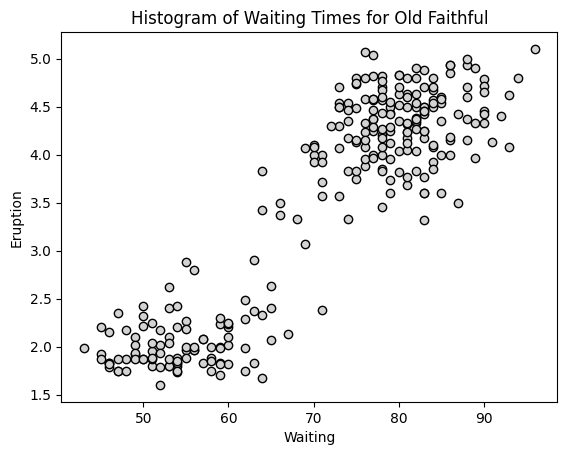

In [79]:
df = pd.read_csv('oldfaithful.csv')
dataN = df.to_numpy()

eruption = dataN[:, 0]
waiting = dataN[:, 1]

plt.scatter(waiting, eruption, color='lightgray', edgecolor='black')
plt.xlabel('Waiting')
plt.ylabel('Eruption')
plt.title('Histogram of Waiting Times for Old Faithful')
plt.show()

Text(0.5, 1.0, 'Normal Q-Q Plot')

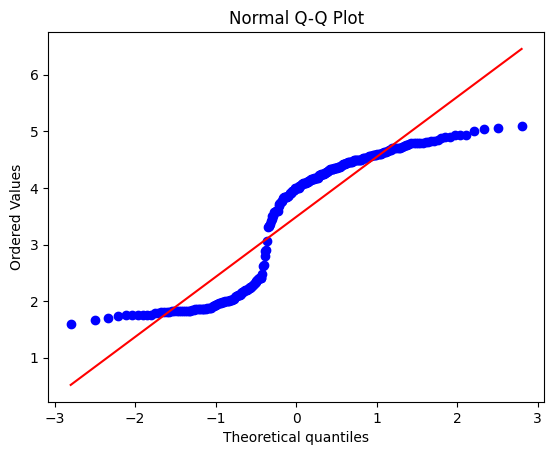

In [80]:
#QQ Plot
stats.probplot(eruption, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")
                    

In [82]:
#read data
path = "oldfaithful.csv"
df_new = pd.read_csv(path)

#values extracts the values, but we need them as 2-D array (num values X number of features: rowsX1, where -1 says you figure out number of rows 
X = df_new[['Waiting']].values.reshape(-1, 1)
y = df_new[['Eruption']].values.reshape(-1, 1)

In [83]:
# Fit a least squares regression model
linModel = LinearRegression();


#Learn the best fitting line through the data by minimizing the sum of squares residuals.
linModel.fit(X, y)
#fit(X,y) gives us the slope and y-intercept
print("Slope (m):", linModel.coef_[0])
print("Intercept (b):", linModel.intercept_)



Slope (m): [0.07562795]
Intercept (b): [-1.87401599]


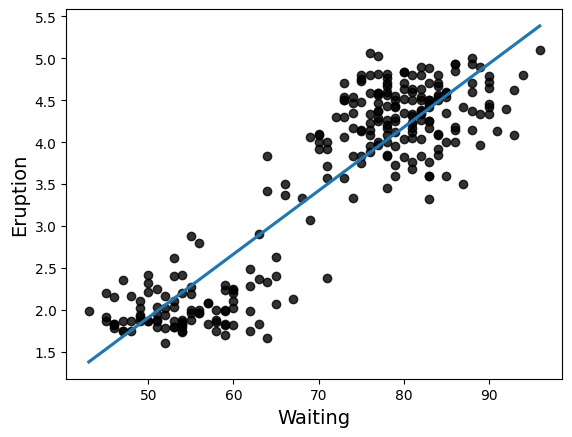

In [86]:
#now plot it using seaborn
p = sns.regplot(data=df_new, x='Waiting', y='Eruption', ci=False, scatter_kws={'color':'black'})
p.set_xlabel('Waiting', fontsize=14);
p.set_ylabel('Eruption', fontsize=14);

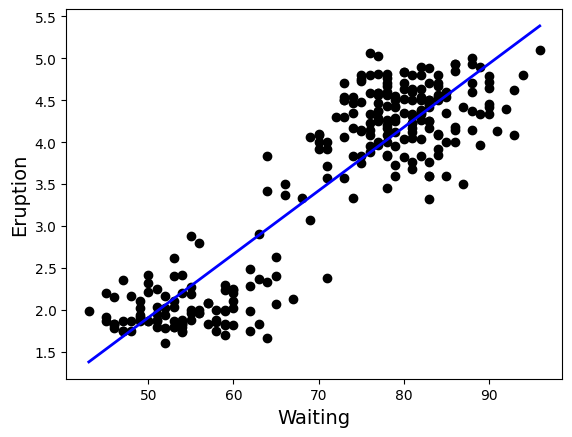

In [87]:
#Same thing can be done with matplotlib--the sorting is done under the hood in seaborn.  This seems clearer to me
# Predict y-values along the fitted line and plot scatter points
y_pred = linModel.predict(X)
plt.scatter(X, y, color='black')

#plot the regression line.  
#sort the data, to make sure latitudes are in order
X_plot = np.sort(X,axis=0)
#re-predict based on sorted data
y_plot = linModel.predict(X_plot)

# Plot regression line (sorted by X for a clean line)
plt.plot(X_plot, y_plot,color='blue', linewidth=2)
# Label axes
plt.xlabel('Waiting', fontsize=14)
plt.ylabel('Eruption', fontsize=14)
plt.show()


In [88]:
# Calculate predicted values and residuals
yResid = y_pred - y

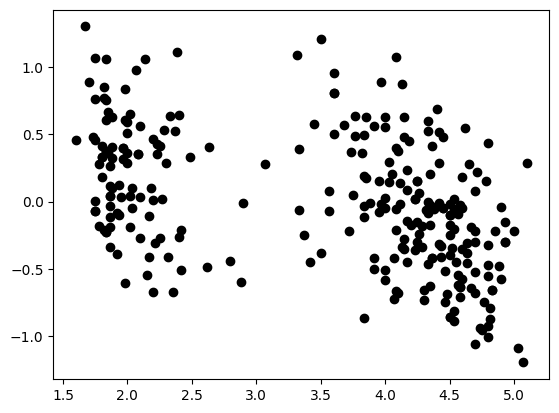

In [89]:
#scatter plot y predicted against y resid.  If the data is linear, this should appear random\
plt.scatter(y, yResid, color='black')

Text(0.5, 1.0, 'Fitted value vs. residual plot')

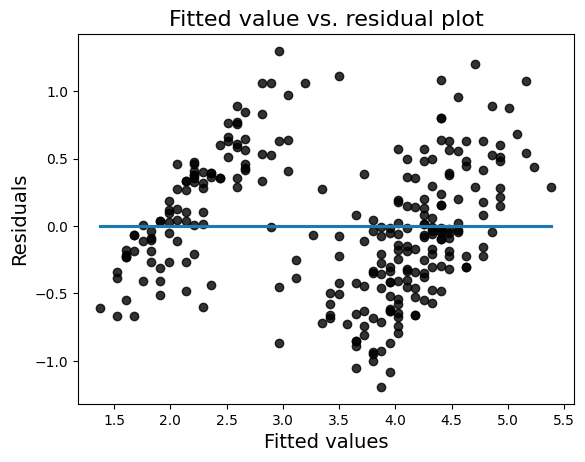

In [90]:
#hear seaborn is an improvement
# Scatter plot with predicted values vs. residuals
# Points should be scattered around a horizontal line at y=0 with no obvious pattern
p = sns.regplot(x=y_pred, y=yResid, ci=False, scatter_kws={'color':'black'})
p.set_xlabel('Fitted values', fontsize=14)
p.set_ylabel('Residuals', fontsize=14)
p.set_title('Fitted value vs. residual plot', fontsize=16)

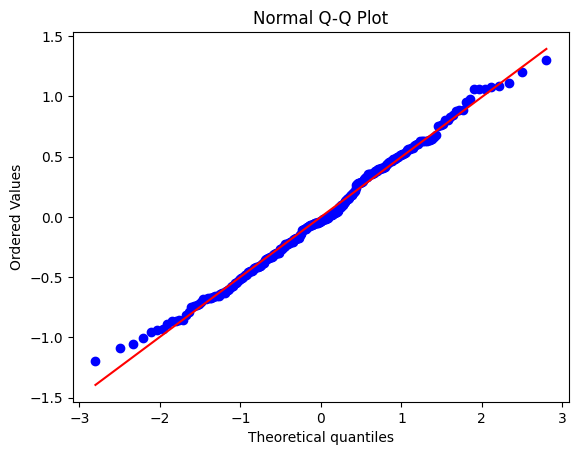

In [91]:
#reshape the 2-D array for use as a vector in plotting
#since the residuals are close to the line, they are normally distributed, one of the requirements for data being linear
yResid = np.asarray(yResid).reshape(-1)
stats.probplot(yResid, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()